A Survey on Technology Choice
======


In [24]:
# For nicer printing
options(digits=2);

In [25]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [26]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit                                     PG1PsnUse  
 Min.   :   0   Min.   :    2   For personal work and/or research use:727  
 1st Qu.:   0   1st Qu.:    6                                        :613  
 Median : 102   Median :    9   Chapter book                         :  1  
 Mean   : 249   Mean   :  299   dissertation research           

### Interpret  basic summaries

In [27]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,⋯,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,⋯,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,⋯,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,⋯,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,⋯,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,⋯,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,⋯,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,⋯,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,⋯,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,⋯,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,⋯,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


In [28]:
library(dplyr)
library(tidyr)
library(caret)
library(randomForest)

Interpret correlations: onlys start vs End, calculate differene instead


In [29]:
data_complete = filter(data, Completed == TRUE)

# Number of rows removed
print(nrow(data))
print(nrow(data_complete))

[1] 1353
[1] 805


In [30]:
# Survey Time
survey_time = data_complete$End - data_complete$Start
print(paste0("Max Survey Time: ", max(survey_time), ' seconds'))
print(paste0("Min Survey Time: ", min(survey_time), ' seconds'))
print(paste0("Average Survey Time: ", round(mean(survey_time)), ' seconds'))
print(paste0("Median Survey Time: ", median(survey_time), ' seconds'))

[1] "Max Survey Time: 87551 seconds"
[1] "Min Survey Time: 51 seconds"
[1] "Average Survey Time: 680 seconds"
[1] "Median Survey Time: 225 seconds"


In [31]:
# Select only completion times and remove a couple na
completion_time = select(data_complete, contains('Submit')) %>%
    na.omit()
print(summary(completion_time))

   PG0Submit       PG1Submit      PG2Submit      PG3Submit      PG4Submit  
 Min.   :    2   Min.   :   1   Min.   :   1   Min.   :   1   Min.   :  1  
 1st Qu.:    6   1st Qu.:  11   1st Qu.:   9   1st Qu.:  16   1st Qu.:  6  
 Median :   10   Median :  16   Median :  13   Median :  24   Median :  7  
 Mean   :  242   Mean   :  42   Mean   :  31   Mean   :  42   Mean   :  9  
 3rd Qu.:   15   3rd Qu.:  31   3rd Qu.:  31   3rd Qu.:  41   3rd Qu.:  9  
 Max.   :66474   Max.   :6892   Max.   :1470   Max.   :4648   Max.   :332  
   PG5Submit      PG6Submit      PG7Submit     PG8Submit     PG9Submit    
 Min.   :   3   Min.   :   1   Min.   :  1   Min.   :  1   Min.   :    0  
 1st Qu.:  45   1st Qu.:   7   1st Qu.:  6   1st Qu.:  5   1st Qu.:    7  
 Median :  62   Median :   9   Median :  8   Median :  8   Median :   10  
 Mean   :  85   Mean   :  25   Mean   : 11   Mean   : 12   Mean   :   40  
 3rd Qu.:  84   3rd Qu.:  12   3rd Qu.: 11   3rd Qu.: 14   3rd Qu.:   14  
 Max.   :4130   Ma

In [32]:
avg_completion_time = colMeans(completion_time)
med_completion_time = apply(completion_time, 2, FUN = median)
print('Average Completion Time')
print(avg_completion_time)
print('Median Completion Time')
print(med_completion_time)

[1] "Average Completion Time"
 PG0Submit  PG1Submit  PG2Submit  PG3Submit  PG4Submit  PG5Submit  PG6Submit 
     241.5       42.4       31.4       42.5        9.1       85.2       24.5 
 PG7Submit  PG8Submit  PG9Submit PG10Submit PG11Submit PG12Submit 
      10.6       11.6       39.9       16.7        6.4        7.8 
[1] "Median Completion Time"
 PG0Submit  PG1Submit  PG2Submit  PG3Submit  PG4Submit  PG5Submit  PG6Submit 
        10         16         13         24          7         62          9 
 PG7Submit  PG8Submit  PG9Submit PG10Submit PG11Submit PG12Submit 
         8          8         10          7          4          5 


In [33]:
# Select only completion times and remove a couple na
crit_responses = select(data_complete, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit')) 
print(summary(crit_responses))

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

    18 - 24     25 - 34     35 - 44     45 - 54     55 - 64 65 and over 
         34         338         258          89          36           8 


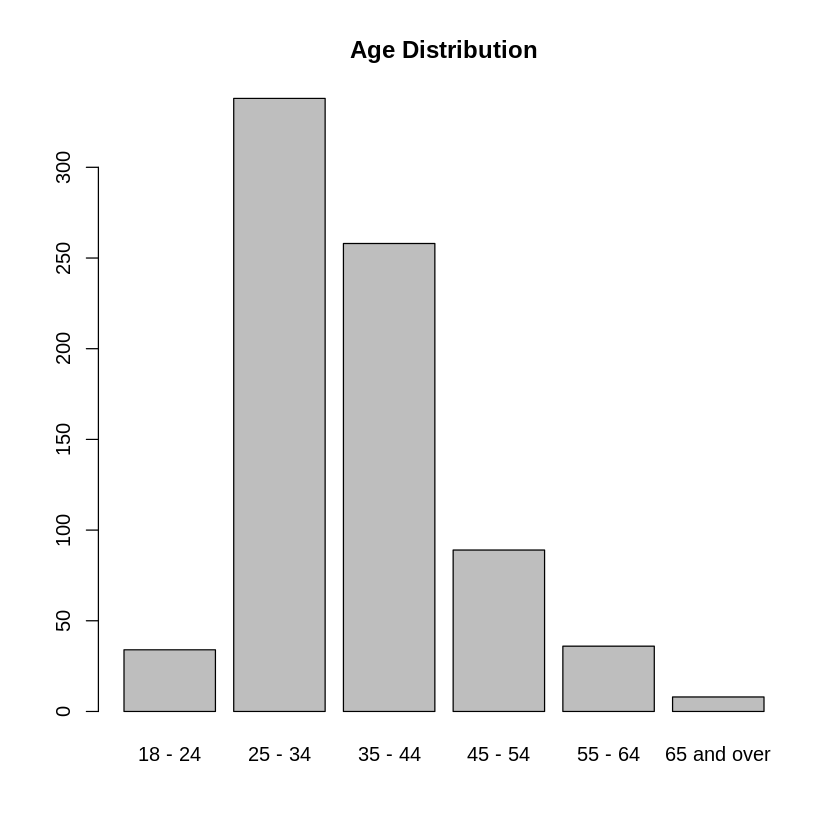

In [34]:
age = select(data_complete, PG12Resp) %>%
    filter(PG12Resp != '')

age1 = factor(age[,])

#barplot(prop.table(table(age$PG12Resp)))
print(summary(age1))
barplot(table(age1), main = 'Age Distribution')

In [35]:
colnames(data_complete)

[1] "Device"        "Completed"     "Start"         "End"          
 [5] "PG0Dis"        "PG0Shown"      "PG0Submit"     "PG1PsnUse"    
 [9] "PG1WdAuth"     "PG1Trn"        "PG1Other"      "PG1Submit"    
[13] "PG2Resp"       "PG2Submit"     "PG2Resp.1"     "PG3Submit"    
[17] "PG4Dtr0_6"     "PG4Psv7_8"     "PG4Prm9_10"    "PG4AllResp"   
[21] "PG4Submit"     "PG5_1RRPQ"     "PG5_1Order"    "PG5_1Time"    
[25] "PG5_2BNUI"     "PG5_2Order"    "PG5_2Time"     "PG5_3HDS"     
[29] "PG5_3Order"    "PG5_3Time"     "PG5_4VGP"      "PG5_4Order"   
[33] "PG5_4Time"     "PG5_5PHR"      "PG5_5Order"    "PG5_5Time"    
[37] "PG5_6SSYOP"    "PG5_6Order"    "PG5_6Time"     "PG5_7NDYP"    
[41] "PG5_7Order"    "PG5_7Time"     "PG5_8CP"       "PG5_8Order"   
[45] "PG5_8Time"     "PG5_9FRP"      "PG5_9Order"    "PG5_9Time"    
[49] "PG5_10RPA"     "PG5_10Order"   "PG5_10Time"    "PG5_11NSG"    
[53] "PG5_11Order"   "PG5_11Time"    "PG5_12NWG"     "PG5_12Order"  
[57] "PG5_12Time"    "PG5_13NFG"     "PG5_13Order"   "PG5_13Time"   
[61] "PG5Submit"     "PG6Resp"       "PG6Submit"     "PG7R"         
[65] "PG7C.C.."      "PG7Java"       "PG7Python"     "PG7Javascript"
[69] "PG7Go"         "PG7C."         "PG7Other"      "PG7Submit"    
[73] "PG8Resp"       "PG8Submit"     "PG9Resp"       "PG9Submit"    
[77] "PG10Resp"      "PG10Submit"    "PG11Resp"      "PG11Submit"   
[81] "PG12Resp"      "PG12Submit"

In [36]:
# Select vars for modeling
vars = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' ,
'PG4AllResp','PG4Submit',
#'PG5_1RRPQ',
'PG5_1Order','PG5_1Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

vars1 = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' ,
'PG4AllResp','PG4Submit',
'PG5_1RRPQ',
#'PG5_1Order',
'PG5_1Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

df = select(data_complete, vars) %>%
    drop_na(PG5_1Order) %>%
    na.omit()
print(summary(df))

df1 = select(data_complete, vars1) %>%
    drop_na(PG5_1RRPQ) %>%
    na.omit()
print(summary(df1))

     Device        Start               End               PG0Dis   
        :  0   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  0   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :323   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  : 88   Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 45  
 Tablet :  5   3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  0   Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                                                                  
    PG0Shown      PG0Submit                                     PG1PsnUse  
 Min.   :   0   Min.   :    2   For personal work and/or research use:290  
 1st Qu.:   0   1st Qu.:    6                                        :120  
 Median : 118   Median :   10   Chapter book                         :  1  
 Mean   : 266   Mean   :   62   dissertation research                :  1  
 3rd Qu.: 463   3rd Qu.:   16   for teaching                         :  1  
 Max.   

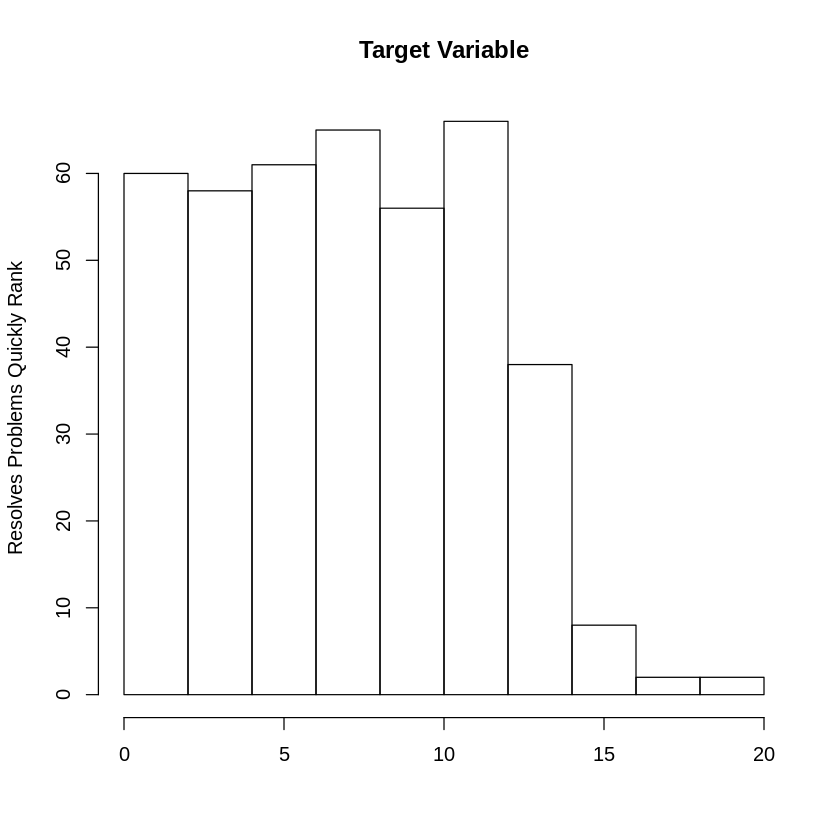

In [37]:
# look at distribution of target response
hist(df$PG5_1Order, main = "Target Variable", ylab = "Resolves Problems Quickly Rank", xlab = "")

In [38]:
# Removing level of target factor
df1 <- filter(df1, PG5_1RRPQ != '')
summary(df1$PG5_1RRPQ)
df1$PG5_1RRPQ <- factor(df1$PG5_1RRPQ)
summary(df1$PG5_1RRPQ)

Essential   High Priority    Low Priority Medium Priority 
              0              48              93              80             114 
 Not a Priority 
             81

Essential   High Priority    Low Priority Medium Priority  Not a Priority 
             48              93              80             114              81

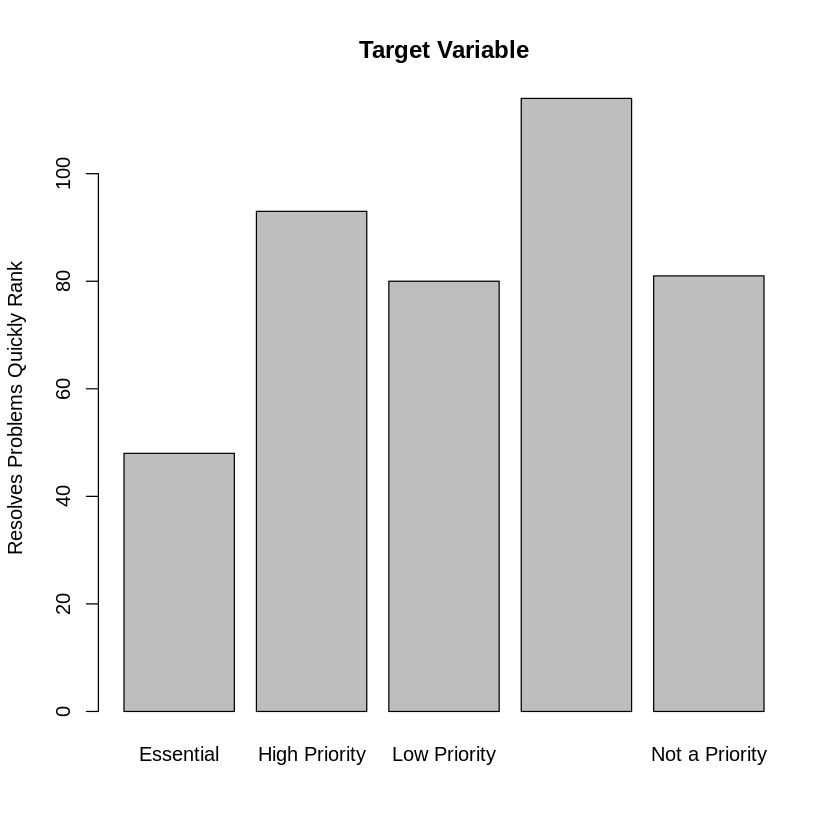

In [39]:
# look at distribution of target response
plot(df1$PG5_1RRPQ, main = "Target Variable", ylab = "Resolves Problems Quickly Rank")

In [40]:
#Checking type of vars
sapply(df, class)

# Checking na
print('DF!')
print(colSums(is.na(df)))
print('DF1!')
print(colSums(is.na(df1)))

Device         Start           End        PG0Dis      PG0Shown 
     "factor"     "numeric"     "numeric"     "integer"     "integer" 
    PG0Submit     PG1PsnUse        PG1Trn     PG1Submit       PG2Resp 
    "numeric"      "factor"      "factor"     "numeric"      "factor" 
    PG2Submit     PG2Resp.1     PG3Submit    PG4AllResp     PG4Submit 
    "numeric"      "factor"     "numeric"     "integer"     "numeric" 
   PG5_1Order     PG5_1Time     PG5Submit       PG6Resp     PG6Submit 
    "integer"      "factor"     "numeric"      "factor"     "numeric" 
         PG7R      PG7C.C..       PG7Java     PG7Python PG7Javascript 
     "factor"      "factor"      "factor"      "factor"      "factor" 
        PG7Go         PG7C.      PG7Other     PG7Submit       PG8Resp 
     "factor"      "factor"      "factor"     "numeric"      "factor" 
    PG8Submit       PG9Resp     PG9Submit      PG10Resp    PG10Submit 
    "numeric"      "factor"     "numeric"      "factor"     "numeric" 
     PG11Resp    PG11Submit      PG12Resp    PG12Submit 
     "factor"     "numeric"      "factor"     "numeric"

[1] "DF!"
       Device         Start           End        PG0Dis      PG0Shown 
            0             0             0             0             0 
    PG0Submit     PG1PsnUse        PG1Trn     PG1Submit       PG2Resp 
            0             0             0             0             0 
    PG2Submit     PG2Resp.1     PG3Submit    PG4AllResp     PG4Submit 
            0             0             0             0             0 
   PG5_1Order     PG5_1Time     PG5Submit       PG6Resp     PG6Submit 
            0             0             0             0             0 
         PG7R      PG7C.C..       PG7Java     PG7Python PG7Javascript 
            0             0             0             0             0 
        PG7Go         PG7C.      PG7Other     PG7Submit       PG8Resp 
            0             0             0             0             0 
    PG8Submit       PG9Resp     PG9Submit      PG10Resp    PG10Submit 
            0             0             0             0            

In [41]:
# Choose factor variables
df_fac = df[sapply(df, class) == 'factor']
# print(summary(df_fac))
# print(colnames(df_fac))
df1_fac = df1[sapply(df1, class) == 'factor']

In [42]:
# This was an attempt to convert matricies to dummy vars but not necessary for caret package (can handle factor vars)
df_fac_mm = data.frame(model.matrix(~ Device + PG1PsnUse + PG1Trn
              + PG2Resp + PG2Resp.1 + PG5_1Time + PG6Resp
             + PG7R + PG7C.C.. + PG7Java + PG7Python + PG7Javascript + PG7Go
             + PG7C. + PG7Other + PG8Resp + PG9Resp + PG10Resp + PG11Resp + PG12Resp, data=df_fac))

In [43]:
# Choose numeric and integer vars
df_num = log((df[sapply(df, class) == 'numeric'  | sapply(df, class) == 'integer']) + 1)
# print(summary(df_num))

In [44]:
# Recombine numeric and factor variables
df_final <- cbind(df_num, df_fac)
df_final1_c <- cbind(df_num, df1_fac)

In [45]:
df_final1 = select(df_final, -c(PG5_1Time, PG2Resp.1, PG8Resp))

smp_size_r <- floor(0.75 * nrow(df_final1))

## set the seed to make your partition reproducible
set.seed(123)
train_ind_r <- sample(seq_len(nrow(df_final1)), size = smp_size_r)

training_r <- df_final[train_ind_r, ]
testing_r <- df_final[-train_ind_r, ]

In [46]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 5,
                           ## repeated ten times
                           repeats = 2)

In [47]:
# The random forest package autmatically converts all factor variables and utilizes them  as dummy variables
set.seed(42)
rffitreg <- train(PG5_1Order ~ ., 
               data = training_r, 
               method = "rf", 
               importance = TRUE,
               trControl = fitControl)
rffitreg

Random Forest 

312 samples
 38 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 2 times) 
Summary of sample sizes: 249, 251, 250, 250, 248, 251, ... 
Resampling results across tuning parameters:

  mtry  RMSE  Rsquared  MAE 
    2   0.60  0.028     0.50
   44   0.59  0.057     0.49
  977   0.60  0.055     0.48

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 44.

In [48]:
total_completed_responses = filter(data, Completed == TRUE)
survey_completion_time = total_completed_responses$End - total_completed_responses$Start
print(paste0("Maximum Time to Complete the Survey: ", max(survey_completion_time), ' seconds'))
print(paste0("Minimum Time to Complete the Survey: ", min(survey_completion_time), ' seconds'))
print(paste0("Average Time to Complete the Survey: ", round(mean(survey_completion_time)), ' seconds'))

[1] "Maximum Time to Complete the Survey: 87551 seconds"
[1] "Minimum Time to Complete the Survey: 51 seconds"
[1] "Average Time to Complete the Survey: 680 seconds"


In [49]:

response_completion_time = select(total_completed_responses, contains('Submit')) %>% na.omit()
# print(summary(response_completion_time))
average_completion_time = colMeans(response_completion_time)
print('Average Completion Time:')
print(average_completion_time)

[1] "Average Completion Time:"
 PG0Submit  PG1Submit  PG2Submit  PG3Submit  PG4Submit  PG5Submit  PG6Submit 
     241.5       42.4       31.4       42.5        9.1       85.2       24.5 
 PG7Submit  PG8Submit  PG9Submit PG10Submit PG11Submit PG12Submit 
      10.6       11.6       39.9       16.7        6.4        7.8 


In [50]:
response_criteria = select(total_completed_responses, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit')) 
print(summary(response_criteria))

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

Handle Missing Values and Categorical Values
To avoid complications, I have replaced the categorical values in the dataset with numeric values. There some missing values in this dataset which need to be carefully handles to get better results. In this case the missing data are replaced with the mean of the column values.

In [51]:
for (i in 1:dim(data)[2]) if (is.factor(data[,i])) data[,i] = as.numeric(data[,i]);
for (i in 1:ncol(data)){
    data[is.na(data[,i]),i] = mean (data[,i],na.rm =TRUE)
}
head (data)

Device,Completed,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1PsnUse,PG1WdAuth,PG1Trn,⋯,PG8Resp,PG8Submit,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG11Submit,PG12Resp,PG12Submit
3,2,1.5e+09,1.5e+09,44,249,299,1,1,1,⋯,1,12,1,40,1,17,1,6.4,1,7.8
3,2,1.5e+09,1.5e+09,44,249,299,1,1,1,⋯,1,12,1,40,1,17,1,6.4,1,7.8
3,3,1.5e+09,1.5e+09,44,249,6,4,1,1,⋯,183,12,3,5,2,6,3,3.0,5,4.0
3,2,1.5e+09,1.5e+09,44,249,25,4,1,1,⋯,1,12,1,40,1,17,1,6.4,1,7.8
3,3,1.5e+09,1.5e+09,44,249,8,4,1,1,⋯,199,19,6,13,2,6,3,4.0,6,5.0
3,2,1.5e+09,1.5e+09,44,249,2,1,1,1,⋯,1,12,1,40,1,17,1,6.4,1,7.8


In [52]:
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);

d =data[,sel]

cor(d,method="spearman",use="pairwise.complete.obs");

,Device,Completed,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1PsnUse,PG1WdAuth,PG1Trn,⋯,PG8Resp,PG8Submit,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG11Submit,PG12Resp,PG12Submit
Device,1.0000,-0.1039,-0.08252,-0.008,0.0058,0.0020,0.0381,-0.039,-0.0586,0.0169,⋯,-0.1070,0.0161,-0.0887,0.13153,-0.0770,0.1349,-0.1059,0.058,-1.1e-01,0.115
Completed,-0.1039,1.0000,-0.03539,-0.443,-0.0155,0.0120,-0.2515,0.395,0.1398,0.1665,⋯,0.8598,-0.2677,0.8601,-0.82428,0.8783,-0.7599,0.9081,-0.667,8.5e-01,-0.685
Start,-0.0825,-0.0354,1.00000,0.656,-0.1211,-0.1468,0.1774,-0.063,-0.0940,0.0381,⋯,-0.0155,0.0236,-0.0147,0.04866,-0.0318,0.0542,-0.0392,0.068,-9.9e-03,0.049
End,-0.0080,-0.4425,0.65555,1.000,-0.0663,-0.1390,0.1608,-0.183,-0.1426,-0.0136,⋯,-0.3748,0.1258,-0.3626,0.38233,-0.3797,0.3702,-0.4103,0.343,-3.5e-01,0.318
PG0Dis,0.0058,-0.0155,-0.12114,-0.066,1.0000,0.8539,-0.0285,0.051,-0.0061,-0.0256,⋯,-0.0149,0.0474,-0.0070,-0.00026,0.0028,-0.0075,-0.0196,-0.038,-1.5e-02,0.028
PG0Shown,0.0020,0.0120,-0.14682,-0.139,0.8539,1.0000,-0.0181,0.071,0.0167,-0.0332,⋯,0.0059,0.0350,0.0207,-0.02597,0.0128,-0.0319,0.0082,-0.061,6.0e-06,0.012
PG0Submit,0.0381,-0.2515,0.17742,0.161,-0.0285,-0.0181,1.0000,-0.282,-0.1000,-0.0463,⋯,-0.1930,0.1453,-0.2432,0.26746,-0.1672,0.2950,-0.2405,0.216,-2.3e-01,0.222
PG1PsnUse,-0.0386,0.3954,-0.06305,-0.183,0.0511,0.0712,-0.2824,1.000,-0.0490,-0.1746,⋯,0.3164,-0.1271,0.3364,-0.33924,0.3555,-0.2801,0.3816,-0.293,3.1e-01,-0.289
PG1WdAuth,-0.0586,0.1398,-0.09401,-0.143,-0.0061,0.0167,-0.1000,-0.049,1.0000,-0.0922,⋯,0.1162,-0.0824,0.1430,-0.14512,0.1137,-0.1147,0.1552,-0.093,1.5e-01,-0.058
PG1Trn,0.0169,0.1665,0.03807,-0.014,-0.0256,-0.0332,-0.0463,-0.175,-0.0922,1.0000,⋯,0.2170,0.0398,0.1444,-0.10679,0.1813,-0.0592,0.1352,-0.047,1.6e-01,-0.069


In [53]:
hiCor <- function(x, level){
  res <- cor(x, method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(d,.7)

,Completed,PG0Dis,PG0Shown,PG2Resp.1,PG5_1RRPQ,PG5_1Time,PG5_2BNUI,PG5_2Time,PG5_3HDS,PG5_3Time,⋯,PG6Resp,PG6Submit,PG7R,PG8Resp,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG12Resp
Completed,1.000,-0.01554,1.2e-02,0.730,0.570,0.5710,0.532,0.5305,0.6683,0.669,⋯,0.875,-0.78,0.8714,0.8598,0.860,-0.82428,0.8783,-0.7599,0.9081,8.5e-01
PG0Dis,-0.016,1.00000,8.5e-01,0.025,0.018,-0.0012,0.020,0.0038,0.0015,-0.031,⋯,0.011,0.02,-0.0084,-0.0149,-0.007,-0.00026,0.0028,-0.0075,-0.0196,-1.5e-02
PG0Shown,0.012,0.85391,1.0e+00,0.041,0.026,0.0108,0.019,0.0032,-0.0009,-0.039,⋯,0.020,0.01,0.0138,0.0059,0.021,-0.02597,0.0128,-0.0319,0.0082,6.0e-06
PG2Resp.1,0.730,0.02535,4.1e-02,1.000,0.416,0.4156,0.386,0.3857,0.4989,0.498,⋯,0.650,-0.56,0.6511,0.6349,0.657,-0.60038,0.6560,-0.5578,0.6794,6.4e-01
PG5_1RRPQ,0.570,0.01820,2.6e-02,0.416,1.000,0.9383,0.861,0.8329,0.7069,0.656,⋯,0.513,-0.44,0.5144,0.4926,0.491,-0.47177,0.4857,-0.4510,0.5148,4.7e-01
PG5_1Time,0.571,-0.00121,1.1e-02,0.416,0.938,1.0000,0.820,0.8630,0.6905,0.718,⋯,0.519,-0.44,0.5131,0.5051,0.500,-0.46661,0.4944,-0.4206,0.5064,4.7e-01
PG5_2BNUI,0.532,0.02023,1.9e-02,0.386,0.861,0.8197,1.000,0.9536,0.7047,0.656,⋯,0.482,-0.42,0.4760,0.4669,0.451,-0.46165,0.4503,-0.4347,0.4907,4.4e-01
PG5_2Time,0.530,0.00383,3.2e-03,0.386,0.833,0.8630,0.954,1.0000,0.7003,0.715,⋯,0.486,-0.42,0.4758,0.4673,0.464,-0.45483,0.4548,-0.4161,0.4807,4.4e-01
PG5_3HDS,0.668,0.00152,-9.0e-04,0.499,0.707,0.6905,0.705,0.7003,1.0000,0.907,⋯,0.593,-0.51,0.5910,0.5636,0.582,-0.53357,0.5809,-0.5109,0.6211,5.8e-01
PG5_3Time,0.669,-0.03102,-3.9e-02,0.498,0.656,0.7180,0.656,0.7153,0.9070,1.000,⋯,0.599,-0.53,0.5821,0.5749,0.592,-0.54147,0.5706,-0.5187,0.6051,5.8e-01


</b>Normalizing and removing some columns of the data</b>

There are some variables which seem to be overly correlated. To get a better approximation these variables need to be removed from the dataset.

In [55]:
normFunc <- function(x){(x-mean(x, na.rm = T))/sd(x, na.rm = T)}
d[ , names(d) != "PG5_7NDYP"] <- apply(d[ , names(d) != "PG5_7NDYP"], 2, normFunc)

In [56]:
d[c("Completed","Start", "End","PG5_1RRPQ","PG5_2BNUI","PG5_3HDS","PG5_4VGP","PG5_5PHR","PG5_6SSYOP","PG5_9FRP","PG5_8CP",
           "PG5_10RPA","PG5_11NSG","PG5_12NWG","PG5_13NFG", "PG5_2Order", "PG5_2Time","PG5_3Order", "PG5_5Order", "PG5_5Time", 
           "PG5_8Time", "PG5_10Order", "PG5_10Time", "PG5_12Order", "PG5_1Order","PG5_1Time", "PG5_3Time", "PG5_4Order",     
           "PG5_4Time", "PG5_6Order", "PG5_6Time", "PG5_7Order", "PG5_7Time", "PG5_8Order","PG5_11Order", 
           "PG5_11Time", "PG5_12Time", "PG5_13Order", "PG5_13Time" )] <- list(NULL)

Regression Model¶

Linear regression is used to model linear relationship between an outcome variable, y, and a set of covariates or predictor variables x1,x2,…,xp. To construct a linear regression model in R, I used the lm() function. The model that has been fitted is a regression of the outcome Familiarity with packages (PG5_9FRP) against all the other variables in the data set.

In [57]:
model <- lm(PG5_7NDYP ~ ., data = d)

options(scipen=4)  #Set scipen = 0 to get back to default
summary(model)

# library(caret) 
# varImp(model, scale = FALSE)


Call:
lm(formula = PG5_7NDYP ~ ., data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3739 -0.5101 -0.0265  0.1618  2.4805 

Coefficients:
               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   -5.55e-16   2.09e-02    0.00   1.00000    
Device        -1.56e-03   2.14e-02   -0.07   0.94187    
PG0Dis         4.34e-02   2.78e-02    1.56   0.11970    
PG0Shown      -1.84e-02   2.78e-02   -0.66   0.50970    
PG0Submit     -5.70e-02   2.12e-02   -2.69   0.00717 ** 
PG1PsnUse     -1.88e-02   2.45e-02   -0.77   0.44365    
PG1WdAuth      7.92e-02   2.20e-02    3.60   0.00033 ***
PG1Trn        -5.09e-02   2.38e-02   -2.13   0.03302 *  
PG1Other      -1.71e-02   2.14e-02   -0.80   0.42318    
PG1Submit     -2.84e-02   2.12e-02   -1.34   0.17987    
PG2Resp        2.50e-02   2.83e-02    0.88   0.37683    
PG2Submit     -2.05e-02   2.18e-02   -0.94   0.34914    
PG2Resp.1      1.82e-02   2.74e-02    0.66   0.50722    
PG3Submit      3.08e-02   2.13e-02    1.44   0.1

Validating Hypothesis

Looking at the p-values, it looks like PG2Resp.1, PG5_9Order, PG5_9Time, PG6Resp, PG7R, PG7Submit, PG11Resp are all statistically significant predictors of PG5_9FRP. The coefficients for the predictors PG2Resp.1, PG5_9Order, PG5_9Time, PG6Resp, PG7R, PG7Submit, PG11Resp are all positive, referring that PG5_9FRP is positively associated with them.

Model Interpretation:

- Residuals: Residuals are representing the error between the prediction of the model and the actual results. Smaller residuals are better.
- Residual standard error:This term represents the average amount that the response variable measurements deviate from the fitted linear model (the model error term).
- Degrees of freedom (DoF):It is the number of independent pieces of information that were used to calculate an estimate. DoF are related to, but not the same as, the number of measurements.
- Multiple R-squared:The R^2 value is a measure of how close our data are to the linear regression model. R^2 values are always between 0 and 1; numbers closer to 1 represent well-fitting models. R^2 always increases as more variables are included in the model, and so adjusted R^2 is included to account for the number of independent variables used to make the model.
- F statistic:This test statistic tells us if there is a relationship between the dependent and independent variables being tested. Generally, a large F indicates a stronger relationship.
- p-value: This p-value is associated with the F statistic, and is used to interpret the significance for the whole model fit to our data.
- Coefficients: Estimate and Std. Error: Standard errors tell us the average variation of the estimated coefficients from the actual average of our response variable.
- t value: This is a test statistic that measures how many standard deviations the estimated coefficient is from zero.

Therefore, looking at the model summary it can be inferred that the initial hypothesis was somewhat partially true. Other than level of experience, primary programming language and first time introduction to the package; familiarity with packages can be influenced surprisingly by gender and not by age or by profession of the individual. However, there can also be a chance of unreliability in the results due to improper choice of model. Next I have tried to validate the choice of model for the analysis.

### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?